# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import time as time
from datetime import timedelta
import cv2
import tensorflow as tf
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

logs_path = './tensorflow_logs/traffic_sign'
LOG=False 

In [2]:
%load_ext line_profiler

In [3]:
from sklearn.preprocessing import OneHotEncoder

def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()   
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

In [4]:
# Load pickled data
import pickle
import numpy as np
from pprint import pprint


training_file = "data/train.p"
validation_file="data/valid.p"
testing_file = "data/test.p"
signnames_file = "signnames.csv"



with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}
    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

pprint(y_train)

labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)


array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = X_train[0].shape

# Unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

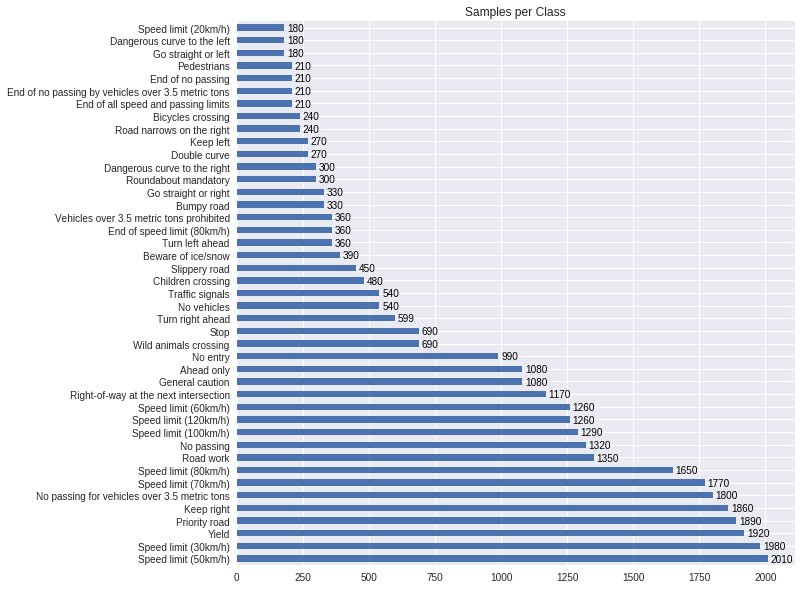

/home/alp/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


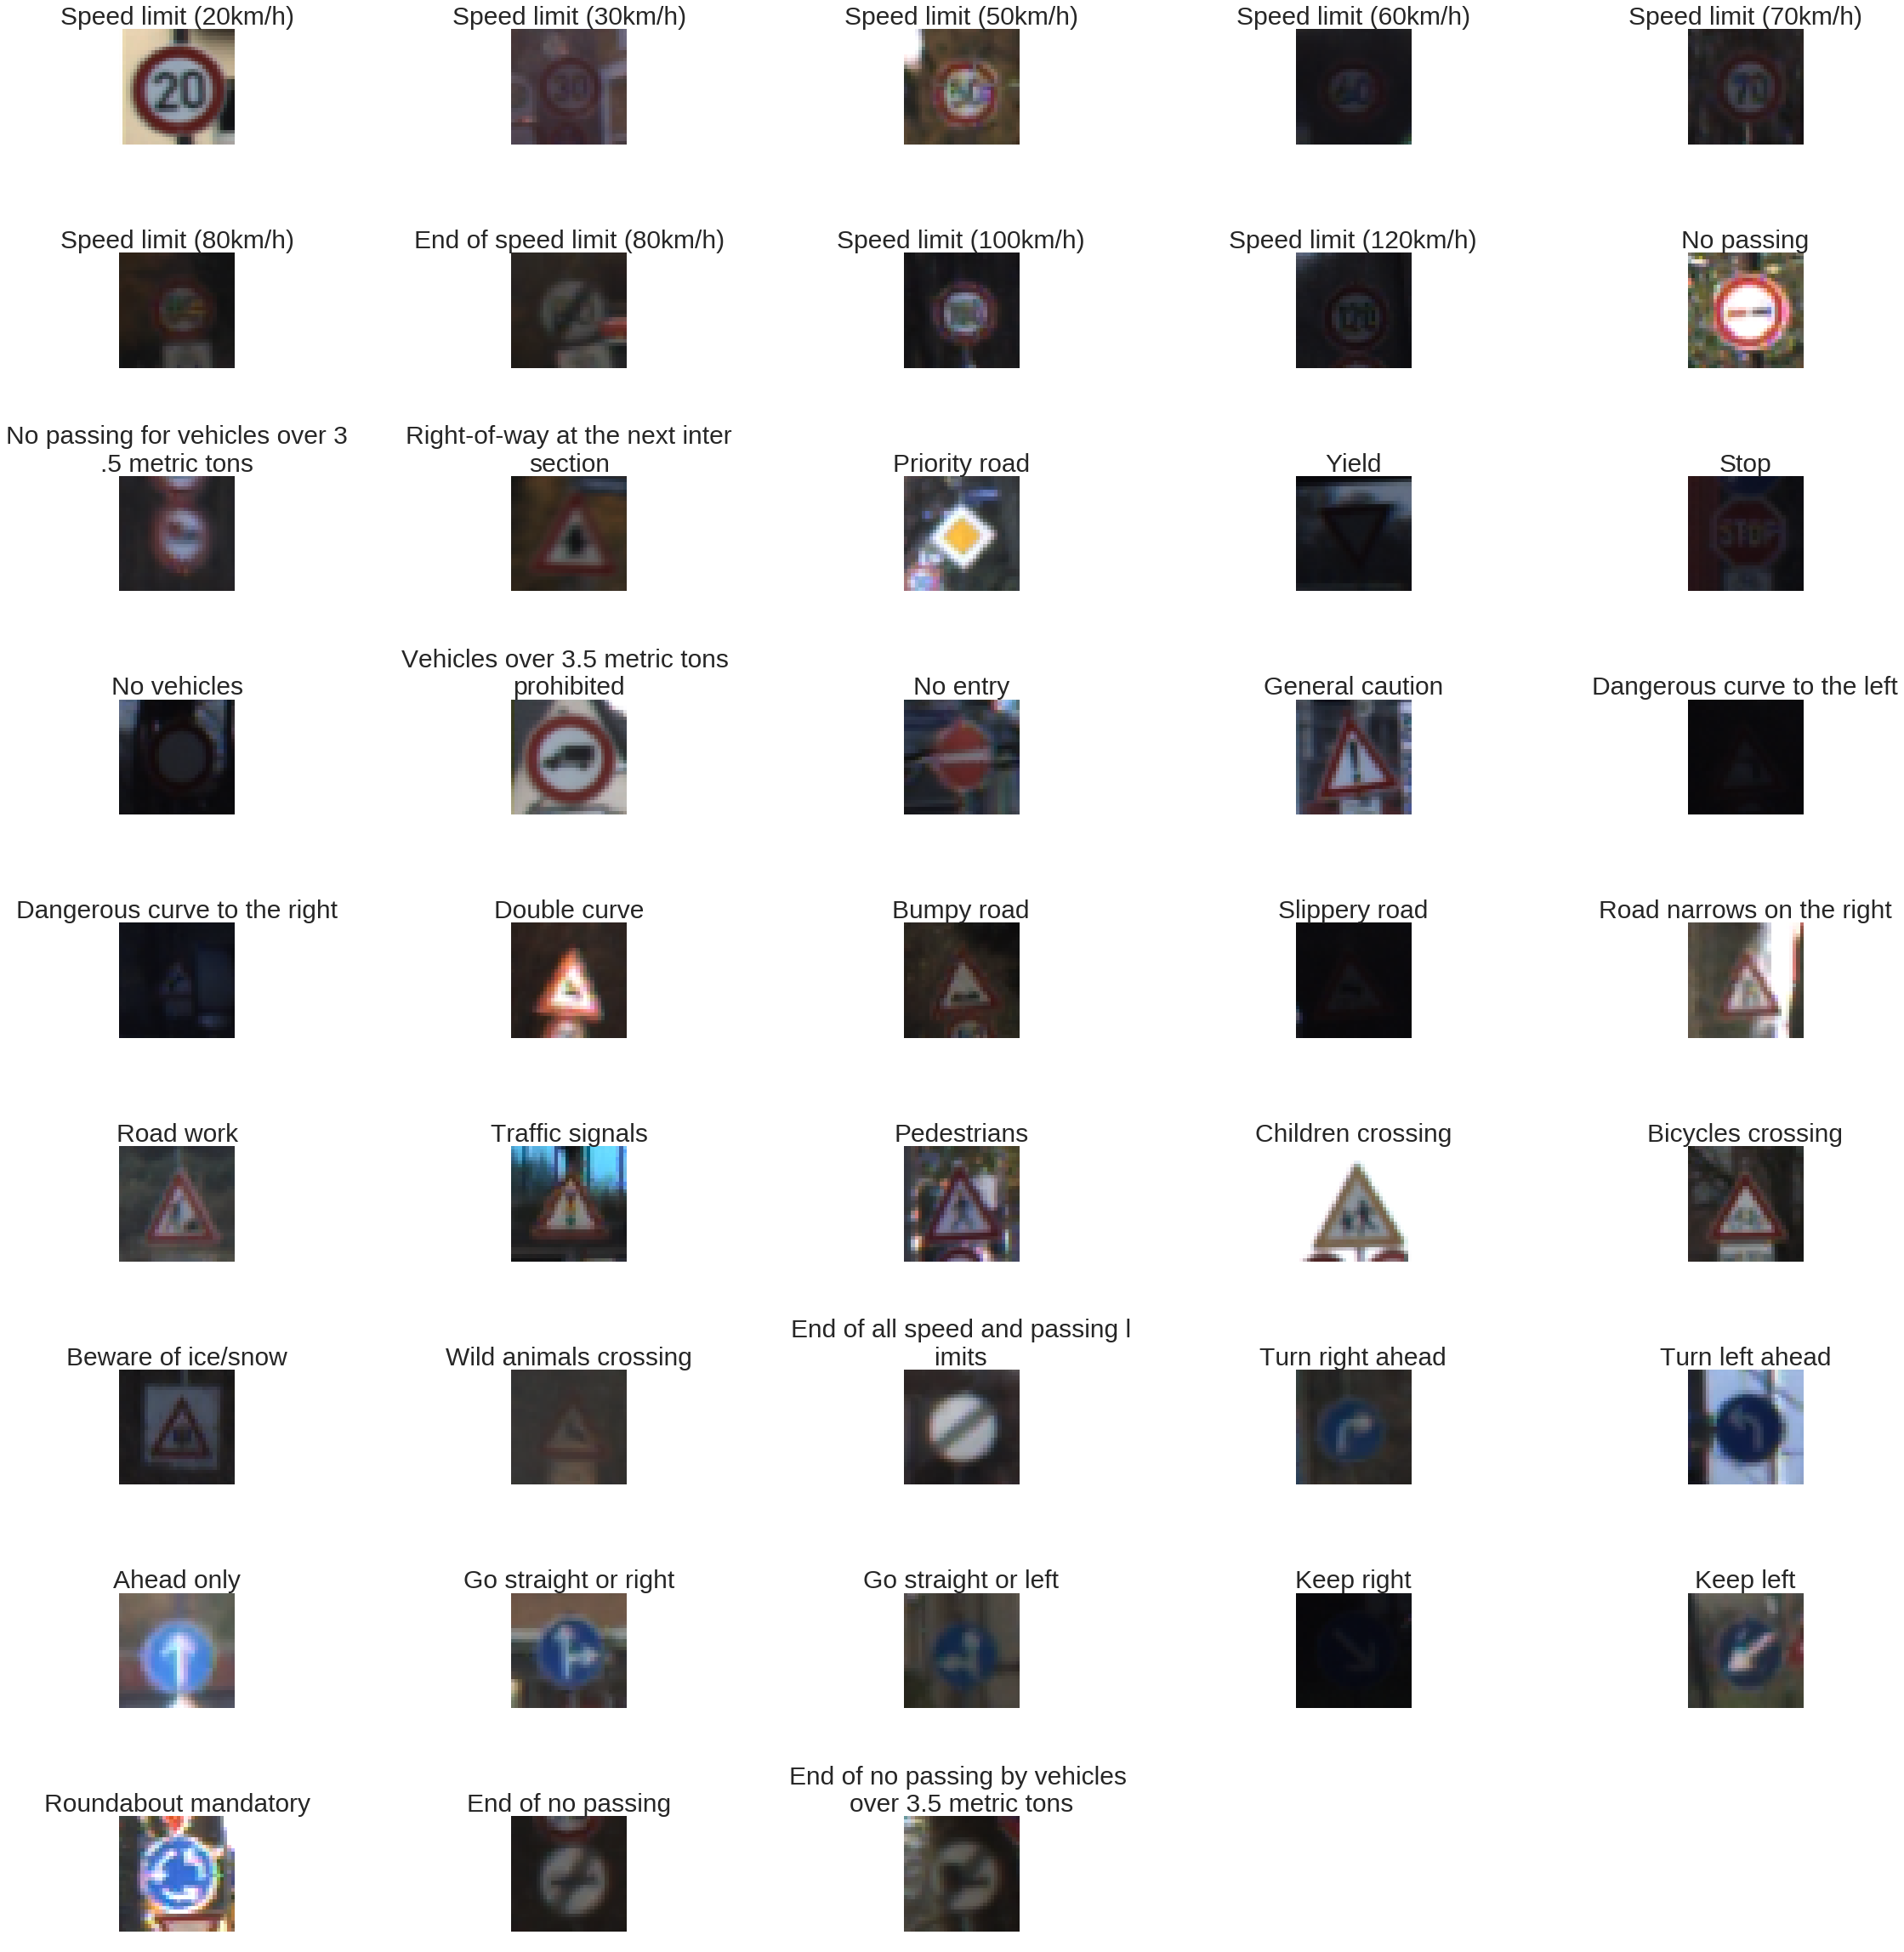

In [6]:
### Data exploration visualization code
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
import seaborn as sns

# Visualizations will be shown in the notebook.
%matplotlib inline


### Label Distribution in Training Data
y_train_df = pd.DataFrame()
y_train_df['label'] = y_train
ax = y_train_df['label'].value_counts().plot(kind='barh', figsize = (10,10), title='Samples per Class')
ax.set_yticklabels(list(map(lambda x: sign_names[x], y_train_df['label'].value_counts().index.tolist())))            
for i, v in enumerate(y_train_df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v), color='black')
    


COLS_PER_ROW = 5
### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':COLS_PER_ROW})
for i in range(n_classes):
    k = np.where(y_train==i)
    img = X_train[k[0][0]]
    ax = fig.add_subplot(int(n_classes/COLS_PER_ROW)+1,COLS_PER_ROW,i+1) 
    ax.axis("off")

    ax.imshow(img, interpolation='none')
    if len(sign_names[y_train[k[0][0]]]) > 30:
        ax.set_title(sign_names[y_train[k[0][0]]][:30] + '\n' + sign_names[y_train[k[0][0]]][30:], fontsize=30)
    else:
        ax.set_title(sign_names[y_train[k[0][0]]], fontsize=30)

    
    
    
plt.show()  






def pre_process_image(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    
    return image

image = X_train[0]


img_resize = image_shape[0]
N_classes = n_classes
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize


X_P_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))], dtype = np.float32)
X_P_test  = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))], dtype = np.float32)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Data Augmentation

In [7]:
img_resize = 32
def transform_image(image,ang_range,shear_range,trans_range,preprocess=True):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    if preprocess:
        image = pre_process_image(image)
    

    return image

def get_index_dict(y_train):
    # Returns indices of each label
    # Assumes that the labels are 0 to N-1
    dict_indices = {}
    ind_all = np.arange(len(y_train))

    for i in range(len(np.unique(y_train))):
        ind_i = ind_all[y_train == i]
        dict_indices[i] = ind_i
    return dict_indices



def extra_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
    
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train)) 
    X_arr = []
    Y_arr = []
    n_train = len(X_train)
    for i in range(n_train):
        #X_arr.append(transform_image(X_train[i],0,0,0)/255.)
        #Y_arr.append(y_train[i])
        for i_n in range(n_each):
            img_trf = transform_image(X_train[i],
                                      ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(y_train[i])
            
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
    
    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr
        
    labels_arr = OHE_labels(Y_arr,43)

    return X_arr,Y_arr,labels_arr



def transform_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
   
    dict_indices = get_index_dict(y_train)
    n_class = len(np.unique(y_train))
    X_arr = []
    Y_arr = []
    for i in range(n_class):
        len_i = len(dict_indices[i])
        ind_rand = np.random.randint(0,len_i,n_each)
        ind_dict_class  = dict_indices[i]
       
        for i_n in range(n_each):
            img_trf = transform_image(X_train[ind_dict_class[ind_rand[i_n]]],ang_range,shear_range,trans_range)
            X_arr.append(img_trf)
            Y_arr.append(i)
           
    X_arr = np.array(X_arr,dtype = np.float32())
    Y_arr = np.array(Y_arr,dtype = np.float32())
   
    if (randomize_Var == 1):
        len_arr = np.arange(len(Y_arr))
        np.random.shuffle(len_arr)
        X_arr[len_arr] = X_arr
        Y_arr[len_arr] = Y_arr
       
    labels_arr = OHE_labels(Y_arr,43)

    return X_arr,Y_arr,labels_arr




### Generate Augmented Data

In [8]:
X_PT_train,y_train_rot,labels_PT_train = transform_data(X_train,y_train,43,10,30,5,5,1)

In [9]:
def random_batch():
    # Number of images in the training-set.
    num_images = len(X_PT_train_1)
    #print("RANDOM BATCH")
    #print(num_images)
    #print(batch_size)
    
    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    features_batch = X_PT_train_1[idx, :,:,:]
    labels_batch = labels_PT_train[idx, :]

    return features_batch, labels_batch

In [10]:
def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)


def get_weights(shape):
    with tf.name_scope('weights'):
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05), name='Weights')
        if LOG:
            variable_summaries(weights)
        return weights

def get_biases(length):
    with tf.name_scope('biases'):
        biases = tf.Variable(tf.constant(0.05, shape=[length]), name='Bias')
        if LOG:
            variable_summaries(biases)
        return biases

def conv_layer(input,
               num_inp_channels,
               filter_size,
               num_filters,
               use_pooling,
               name):
    
    with tf.name_scope(name):

        shape = [filter_size, filter_size, num_inp_channels,num_filters]
        
        weights = get_weights(shape)    
        biases = get_biases(num_filters)

        with tf.name_scope('conv2d'):
            layer = tf.nn.conv2d(input = input,
                                filter = weights,
                                strides = [1,1,1,1],
                                padding = 'SAME',
                                name= name)
            layer += biases

        with tf.name_scope('pooling'):
            if use_pooling:
                layer = tf.nn.max_pool(value=layer,
                                 ksize=[1, 2, 2, 1],
                                 strides=[1, 2, 2, 1],
                                 padding='SAME')

        with tf.name_scope('relu'):
            layer = tf.nn.relu(layer)
    
    return layer, weights


def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer,[-1, num_features])
    return layer_flat, num_features

def fc_layer(input,          # Input layer.
             num_inputs,     # inputs 
             num_outputs,    # outputs.
             name,
             use_relu=True):
    
    weights = get_weights(shape=[num_inputs, num_outputs])
    biases = get_biases(length=num_outputs)
    
    
    with tf.name_scope('Wx_plus_b'):
        layer = tf.matmul(input, weights,name= name) + biases
        if LOG:
            tf.summary.histogram('pre_activations', layer)

    if use_relu:
        layer = tf.nn.relu(layer)

    return layer,weights

def dropout_layer(layer, keep_prob):
    with tf.name_scope('dropout'):
        layer_drop = tf.nn.dropout(layer, keep_prob)
        return layer_drop


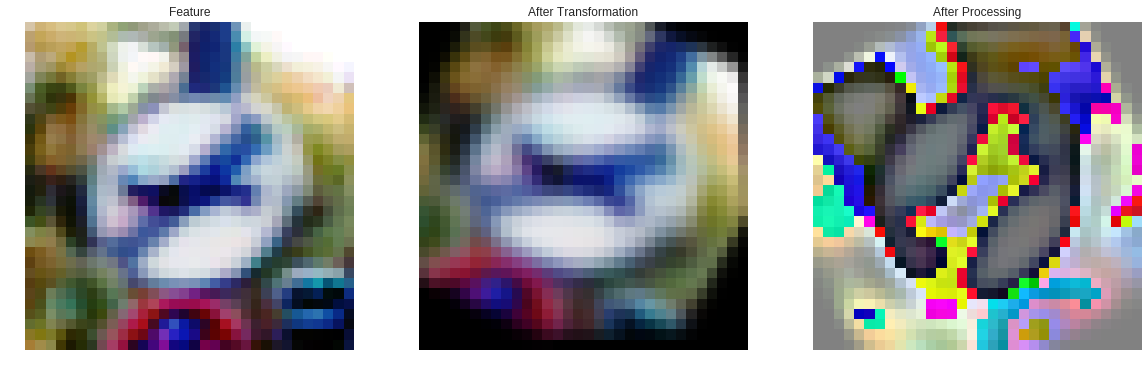

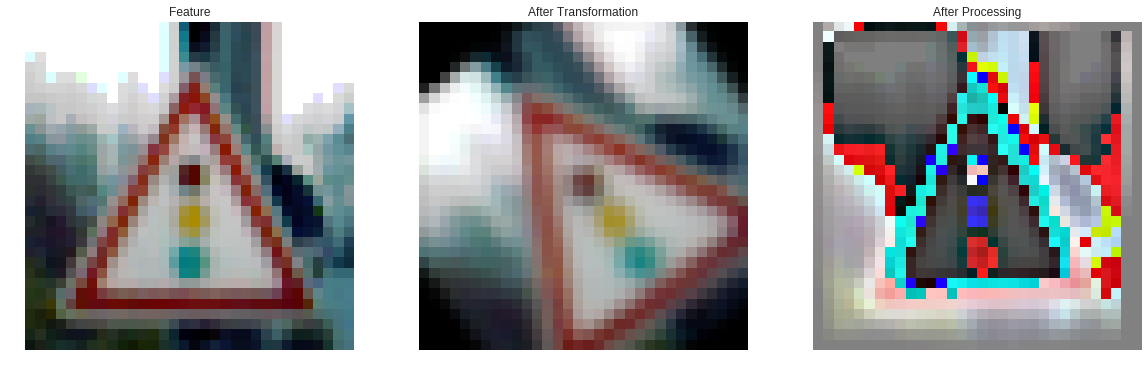

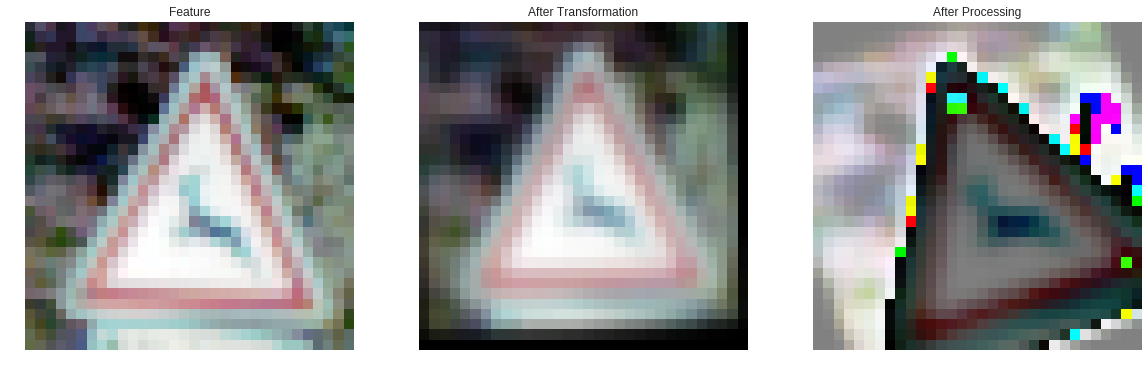

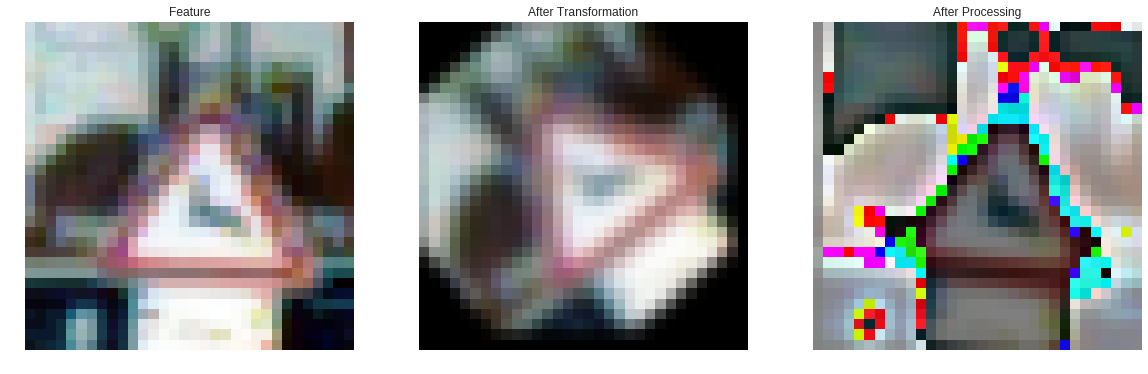

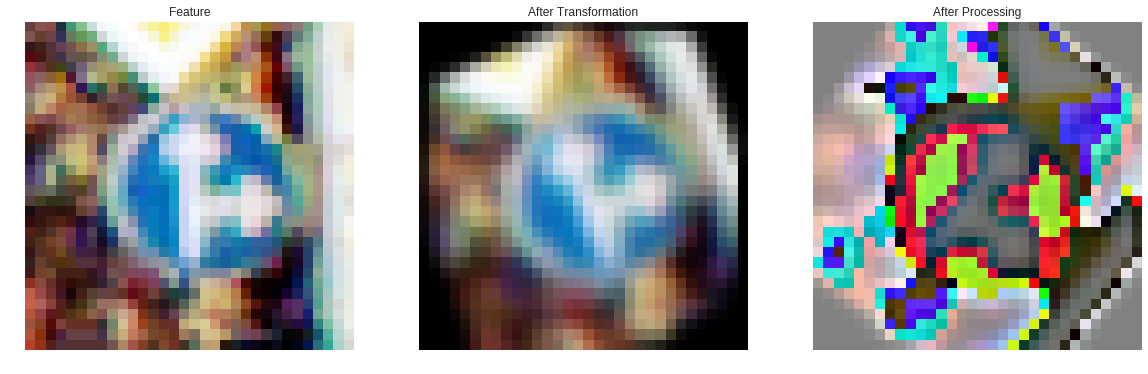

In [11]:
img_size = 32
num_channels = 3 
X_PT_train_1 = X_PT_train
X_P_test_1 = X_P_test

def showbeforeafter(image_number):


    fig = plt.figure(figsize=(20,10))
    a=fig.add_subplot(1,3,1)
    plt.axis('off')

    imgplot= plt.imshow(X_train[image_number])
    a.set_title('Feature')
    
    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(transform_image(X_train[image_number],100*0.9,2*0.9,2*0.9,False))
    imgplot.set_clim(0.0,0.7)
    a.set_title('After Transformation')
    plt.axis('off')

    a=fig.add_subplot(1,3,3)
    imgplot = plt.imshow(transform_image(X_train[image_number],100*0.9,2*0.9,2*0.9,True))
    imgplot.set_clim(0.0,0.7)
    a.set_title('After Processing')
    plt.axis('off')


showbeforeafter(100)
showbeforeafter(1250)
showbeforeafter(500)
showbeforeafter(750)
showbeforeafter(1000)


# plt.imshow(X_PT_train_1[5]+.5);


In [12]:
features = tf.placeholder(tf.float32, shape=[None, img_size, img_size,num_channels], name='features')
tf.summary.image('input', features, 10)
labels_true = tf.placeholder(tf.float32,shape=[None,N_classes], name='y_true')
labels_true_cls = tf.argmax(labels_true, dimension=1)

In [13]:

## Convlayer 0
filter_size0 = 1
num_filters0 = 3

## Convlayer 1
filter_size1 = 5
num_filters1 = 32

## Convlayer 2
filter_size2 = 5
num_filters2 = 32

## Convlayer 3
filter_size3 = 5
num_filters3 = 64

## Convlayer 4
filter_size4 = 5
num_filters4 = 64

## Convlayer 5
filter_size5 = 5
num_filters5 = 128

## Convlayer 6
filter_size6 = 5
num_filters6 = 128

## Convlayer 7
filter_size7 = 5
num_filters7 = 256

## Convlayer 8
filter_size8 = 5
num_filters8 = 256


## FC_size 
fc_size1 = 1024
## FC_size 
fc_size2 = 1024

## Dropout
#drop_prob = 0.5
with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    tf.summary.scalar('dropout_keep_probability', keep_prob)


## Model Architecture

In [14]:
## http://cv-tricks.com/tensorflow-tutorial/training-convolutional-neural-network-for-image-classification/
print("Shapes of Layers")

print("Features.: "+str(features.shape))

layer_conv0, weights_conv0 = \
        conv_layer(input=features,
                   num_inp_channels=num_channels,
                   filter_size=filter_size0,
                   num_filters=num_filters0,
                   use_pooling=False,
                   name='features')
print("Conv 0.: "+str(layer_conv0.shape))
    
layer_conv1, weights_conv1 = \
        conv_layer(input=layer_conv0,
                   num_inp_channels=num_filters0,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=False,
                   name='layer_conv1')
print("Conv. 1: "+str(layer_conv1.shape))
    
layer_conv2, weights_conv2 = \
        conv_layer(input=layer_conv1,
                   num_inp_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True,
                   name='layer_conv2')
print("Conv. 2: "+str(layer_conv2.shape))
    
layer_conv2_drop = dropout_layer(layer_conv2, keep_prob)
print("Conv. 2 after Dropout: "+str(layer_conv2_drop.shape))
    
layer_conv3, weights_conv3 = \
        conv_layer(input=layer_conv2_drop,
                   num_inp_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=False,
                   name='layer_conv3')
print("Conv. 3: "+str(layer_conv3.shape))
     
layer_conv4, weights_conv4= \
        conv_layer(input=layer_conv3,
                   num_inp_channels=num_filters3,
                   filter_size=filter_size4,
                   num_filters=num_filters4,
                   use_pooling=True,
                   name='layer_conv4')
print("Conv. 4: "+str(layer_conv4.shape))

layer_conv4_drop = dropout_layer(layer_conv4, keep_prob)
print("Conv. 4 after Dropout: "+str(layer_conv4_drop.shape))

layer_conv5, weights_conv5 = \
        conv_layer(input=layer_conv4_drop,
                   num_inp_channels=num_filters4,
                   filter_size=filter_size5,
                   num_filters=num_filters5,
                   use_pooling=False,
                   name='layer_conv5')
print("Conv. 5: "+str(layer_conv5.shape))
    
layer_conv6, weights_conv6 = \
        conv_layer(input=layer_conv5,
                   num_inp_channels=num_filters5,
                   filter_size=filter_size6,
                   num_filters=num_filters6,
                   use_pooling=True,
                   name='layer_conv6')    
print("Conv. 6: "+str(layer_conv6.shape))

layer_conv6_drop = dropout_layer(layer_conv6, keep_prob)
print("Conv. 6 after Dropout: "+str(layer_conv6_drop.shape))





layer_conv7, weights_conv7 = \
        conv_layer(input=layer_conv6_drop,
                   num_inp_channels=num_filters6,
                   filter_size=filter_size7,
                   num_filters=num_filters7,
                   use_pooling=False,
                   name='layer_conv7')
print("Conv. 7: "+str(layer_conv7.shape))
    
layer_conv8, weights_conv8 = \
        conv_layer(input=layer_conv7,
                   num_inp_channels=num_filters7,
                   filter_size=filter_size8,
                   num_filters=num_filters8,
                   use_pooling=True,
                   name='layer_conv8')    
print("Conv. 8: "+str(layer_conv8.shape))

layer_conv8_drop = dropout_layer(layer_conv8, keep_prob)
print("Conv. 8 after Dropout: "+str(layer_conv8_drop.shape))



layer_flat2, num_fc_layers2 = flatten_layer(layer_conv2_drop)
print("Flattened Conv. 2.: "+str(layer_flat2.shape))

layer_flat4, num_fc_layers4 = flatten_layer(layer_conv4_drop)
print("Flattened Conv. 4.: "+str(layer_flat4.shape))

layer_flat6, num_fc_layers6 = flatten_layer(layer_conv6_drop)
print("Flattened Conv. 6.: "+str(layer_flat6.shape))

layer_flat8, num_fc_layers8 = flatten_layer(layer_conv8_drop)
print("Flattened Conv. 8.: "+str(layer_flat8.shape))

layer_flat = tf.concat([layer_flat2, layer_flat4, layer_flat6,layer_flat8],1)
print("Flattened Conv. Layers.: "+str(layer_flat.shape))

num_fc_layers = num_fc_layers2+num_fc_layers4+num_fc_layers6+num_fc_layers8

fc_layer1,weights_fc1 = fc_layer(layer_flat,          # The previous layer.
             num_fc_layers,     # Num. inputs from prev. layer.
             fc_size1,    # Num. outputs.
             use_relu=True,
             name='fc_layer1')
print("Fully Connected 1: "+str(fc_layer1.shape))

fc_layer1_drop = dropout_layer(fc_layer1, keep_prob)
print("Fully Connected 1 Droput: "+str(fc_layer1_drop.shape))

fc_layer2, weights_fc2 = fc_layer(fc_layer1_drop,          # The previous layer.
             fc_size1,     # Num. inputs from prev. layer.
             fc_size2,    # Num. outputs.
             use_relu=True,
             name='fc_layer2')
print("Fully Connected 2: "+str(fc_layer2.shape))

fc_layer2_drop = dropout_layer(fc_layer2, keep_prob)
print("Fully Connected 2 Droput: "+str(fc_layer2_drop.shape))

fc_layer3,weights_fc3 = fc_layer(fc_layer2_drop,          # The previous layer.
             fc_size2,     # Num. inputs from prev. layer.
             n_classes,    # Num. outputs.
             use_relu=False,
             name='fc_layer3')
print("Fully Connected 3: "+str(fc_layer3.shape))

labels_pred = tf.nn.softmax(fc_layer3)
labels_pred_cls = tf.argmax(labels_pred, dimension=1)

with tf.name_scope('regularizers'):
    regularizers = (tf.nn.l2_loss(weights_conv0) 
                    + tf.nn.l2_loss(weights_conv1) + tf.nn.l2_loss(weights_conv2) 
                    + tf.nn.l2_loss(weights_conv3) + tf.nn.l2_loss(weights_conv4) 
                    + tf.nn.l2_loss(weights_conv5) + tf.nn.l2_loss(weights_conv6) 
                    + tf.nn.l2_loss(weights_conv7) + tf.nn.l2_loss(weights_conv8) 
                    + tf.nn.l2_loss(weights_fc1)  + tf.nn.l2_loss(weights_fc2) +
                    tf.nn.l2_loss(weights_fc3))
    if LOG:
        tf.summary.scalar('regularizers', regularizers)


Shapes of Layers
Features.: (?, 32, 32, 3)
Conv 0.: (?, 32, 32, 3)
Conv. 1: (?, 32, 32, 32)
Conv. 2: (?, 16, 16, 32)
Conv. 2 after Dropout: (?, 16, 16, 32)
Conv. 3: (?, 16, 16, 64)
Conv. 4: (?, 8, 8, 64)
Conv. 4 after Dropout: (?, 8, 8, 64)
Conv. 5: (?, 8, 8, 128)
Conv. 6: (?, 4, 4, 128)
Conv. 6 after Dropout: (?, 4, 4, 128)
Conv. 7: (?, 4, 4, 256)
Conv. 8: (?, 2, 2, 256)
Conv. 8 after Dropout: (?, 2, 2, 256)
Flattened Conv. 2.: (?, 8192)
Flattened Conv. 4.: (?, 4096)
Flattened Conv. 6.: (?, 2048)
Flattened Conv. 8.: (?, 1024)
Flattened Conv. Layers.: (?, 15360)
Fully Connected 1: (?, 1024)
Fully Connected 1 Droput: (?, 1024)
Fully Connected 2: (?, 1024)
Fully Connected 2 Droput: (?, 1024)
Fully Connected 3: (?, 43)


In [15]:
with tf.name_scope('cross_entropy'):
    diff = tf.nn.softmax_cross_entropy_with_logits(logits=fc_layer3,
                                                        labels=labels_true)
    with tf.name_scope('total'):
        cross_entropy = tf.reduce_mean(diff)

with tf.name_scope('Loss'):
    cost = cross_entropy+1e-5*regularizers
    if LOG:
        tf.summary.scalar('cost', cost)

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-3, name="optimizer").minimize(cost)

with tf.name_scope('Prediction'):
    correct_prediction = tf.equal(labels_pred_cls, labels_true_cls)

with tf.name_scope('Accuracy'):
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    if LOG:
        tf.summary.scalar('accuracy', accuracy)

batch_size = 256





## Training Pipeline

In [16]:
def optimize(num_iterations):
    global total_iterations
    global best_validation_accuracy
    global last_improvement
    global best_test_accuracy
    
    global val_acc_list
    global batch_acc_list
    global test_acc_list
    
    #num_iter = np.math.floor(len(labels_PT_train)/batch_size)
    #num_iter = min(num_iter-2,num_iterations)
    
    #summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    num_iter = num_iterations
    for i in tqdm(range(num_iter)):
        total_iterations+=1
        # Get batch for training
        features_batch, labels_true_batch = random_batch()

        feed_dict_batch = {features:features_batch,
                            labels_true: labels_true_batch,
                            keep_prob: 0.5}      
        if LOG:
            session.run(tf.global_variables_initializer())
            merged_summary_op = tf.summary.merge_all()
            run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
            run_metadata = tf.RunMetadata()
            _, c, summary = session.run([optimizer, cost, merged_summary_op],feed_dict = feed_dict_batch, options=run_options, run_metadata=run_metadata)
            summary_writer.add_summary(summary, i)
        else:
            session.run(optimizer,feed_dict = feed_dict_batch)
  
        
        if ((total_iterations % 200 == 0) or (i == (num_iter - 1))):
            # Calculate the accuracy on the training-set.
            acc_batch = session.run(accuracy, feed_dict=feed_dict_batch)
            acc_valid = session.run(accuracy, feed_dict=feed_dict_valid)
            
            val_acc_list.append(acc_valid)
            batch_acc_list.append(acc_batch)
            
            if acc_valid > best_validation_accuracy:
                best_validation_accuracy = acc_valid
                last_improvement = total_iterations
                improved_str = '*'
                saver = tf.train.Saver()
                saver.save(sess=session, save_path='model_best_batch')
            else:
                improved_str = ''
            
            if total_iterations - last_improvement > require_improvement:
                print("No improvement found in a while, stopping optimization.")
                break

            # Message for printing.
            if ((total_iterations % 5000 == 0) or (i == (num_iter - 1))):
                msg = "# {0:>6}, Train Acc.: {1:>6.1%}, Val Acc.: {2:>6.1%}, Test Acc.: {3:>6.1%}"
                acc_test = session.run(accuracy,feed_dict=feed_dict_test)
                
                if best_test_accuracy<acc_test:
                    saver = tf.train.Saver()
                    saver.save(sess=session, save_path='model_best_test')
                    best_test_accuracy = acc_test
                    #print_accuracy()
                # Print it.
                print(msg.format(i+1, acc_batch,acc_valid,
                                     acc_test))

In [17]:
def print_accuracy():
    acc = session.run(accuracy,feed_dict=feed_dict_test)
    print("Accuracy on test set: {0:>6.1%}".format(acc))
    


## Model Evaluation

In [18]:
feed_dict_test = {features: X_P_test_1,
                 labels_true: labels_test,
                 labels_true_cls:y_test,
                 keep_prob:1.0}



session = tf.Session()
session.run(tf.global_variables_initializer())




In [19]:
print_accuracy()


Accuracy on test set:   0.7%


In [20]:
val_acc_list = []
batch_acc_list = []
train_acc_list = []
batch_size = 256


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
start_time = time.time()
total_iterations = 0
require_improvement = 10000
ang_rot = 10
trans_rot = 2
shear_rot = 2
n_opt = 40000
best_test_accuracy = 0.0
    
for i_train in range(1):
    best_validation_accuracy = 0.0
    last_improvement = 0    
    
    
    # X_PT_train,y_train_rot,labels_PT_train = transform_data(X_train,y_train,43,5000,30,5,5,1)

    if i_train>-1:
        print(i_train)
        ang_rot = 10*0.9**(i_train)
        trans_rot = 2*0.9**(i_train)
        shear_rot = 2*0.9**(i_train)
        require_improvement = 5000
        n_opt = 15000
                
    X_train_SS, X_valid_SS, y_train_SS , y_valid_SS = \
                                train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.25,
                                                 random_state=22)
    labels_valid_SS = OHE_labels(y_valid_SS,43)
    image_GS_valid = np.array([pre_process_image(X_valid_SS[i]) for i in range(len(X_valid_SS))],
                          dtype = np.float32)
    
    feed_dict_valid = {features: image_GS_valid,
                 labels_true: labels_valid_SS,
                 labels_true_cls:y_valid_SS,
                 keep_prob:1.0}

    X_PT_train,y_train_rot,labels_PT_train = extra_data(X_train_SS,y_train_SS,43,10,
                                                                     ang_rot,trans_rot,shear_rot,1)
    print('Optimization Loop # '+str(i_train))    
    X_PT_train_1 = X_PT_train 
    # %lprun -f optimize(n_opt)

    optimize(n_opt)
    
    
end_time = time.time()

time_diff = end_time-start_time

  0%|          | 0/15000 [00:00<?, ?it/s]

Optimization Loop # 0


 33%|███▎      | 5001/15000 [06:38<1:35:34,  1.74it/s]

#   5000, Train Acc.:  98.8%, Val Acc.:  99.6%, Test Acc.:  95.2%


 67%|██████▋   | 10001/15000 [12:49<32:46,  2.54it/s] 

#  10000, Train Acc.:  99.2%, Val Acc.:  99.7%, Test Acc.:  96.7%


100%|██████████| 15000/15000 [18:59<00:00, 13.16it/s]

#  15000, Train Acc.:  99.6%, Val Acc.:  99.8%, Test Acc.:  97.2%


In [22]:
time_diff

1162.1019446849823

(0, 800)

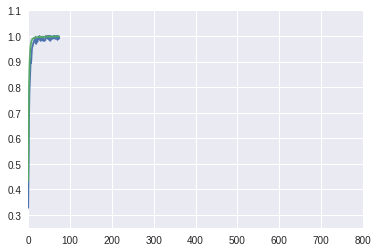

In [23]:
plt.plot(batch_acc_list)
plt.plot(val_acc_list)
plt.ylim(.25,1.1)
plt.xlim(0,800)

In [24]:
saver = tf.train.Saver()
saver.restore(sess=session, save_path='model_best_test')
print_accuracy()


INFO:tensorflow:Restoring parameters from model_best_test
Accuracy on test set:  97.2%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

6


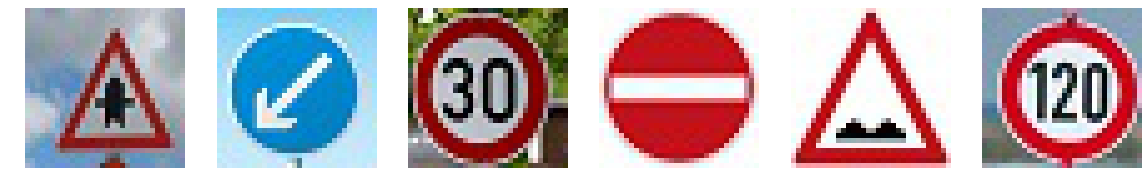

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


import os
from scipy.ndimage import imread

german_traffic_signs_dir = './german-traffic-signs/'
traffic_sign_file_names = os.listdir(german_traffic_signs_dir)
plt.figsize = (20,10)
X_images = []

fig = plt.figure(figsize=(20,10))


for f in traffic_sign_file_names:
    if f.endswith('.jpg') or f.endswith('.PNG'):
        image = imread(german_traffic_signs_dir + f)
        X_images.append(image)

num_images = len(X_images)
print(num_images)

#fig, axarr = plt.subplots(num_images)


for img_num, image in enumerate(X_images):
    a=fig.add_subplot(1,len(X_images),img_num+1)
    plt.axis('off')
    plt.imshow(image)

plt.show()

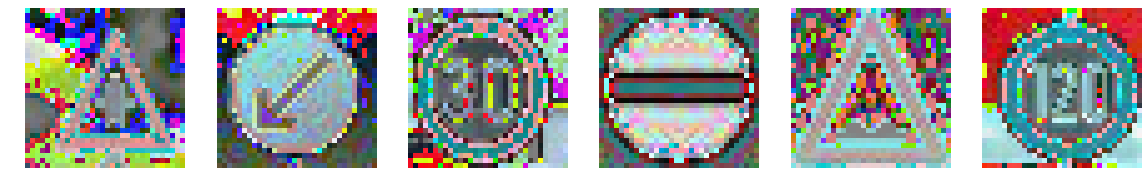

In [26]:
SPEED_LIMIT_30 = 1
SPEED_LIMIT_120 = 8
RIGHT_OF_WAY = 11
NO_ENTRY = 17
BUMPY_ROAD = 22
KEEP_LEFT = 39

y_images = [
        RIGHT_OF_WAY,
        KEEP_LEFT,
        SPEED_LIMIT_30,
        NO_ENTRY,
        BUMPY_ROAD,
        SPEED_LIMIT_120
]
X_gray_images=[]

fig = plt.figure(figsize=(20,10))

for img_num, image in enumerate(X_images):
    a=fig.add_subplot(1,len(X_images),img_num+1)

    processed_image=pre_process_image(image)
    X_gray_images.append(processed_image)
    plt.imshow(processed_image, cmap='gray')
    plt.axis('off')
plt.show()




### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()



with tf.Session() as sess:
    saver.restore(sess, './model_best_test')
    #x_batch = np.expand_dims(X_gray_images, axis=3) # TF requires 4 dimensions
    #print(x_batch)
    #print(y_images)
    image_GS_new = np.array([pre_process_image(X_images[i]) for i in range(len(X_images))],
                          dtype = np.float32)

    #labels_arr = OHE_labels(np.array(y_images),6)
    result_logits = sess.run(labels_pred, feed_dict={features: image_GS_new, keep_prob: 1.0})


    
    
    
    predictions = tf.argmax(result_logits, 1).eval()
    compare_prediction = tf.equal(predictions, y_images)
    accuracy = tf.reduce_mean(tf.cast(compare_prediction, tf.float32)).eval()
    for idx, prediction in enumerate(predictions):
        prediction_name = sign_names[prediction]
        true_label = sign_names[y_images[idx]]
        print("PREDICTION {}".format(idx+1))
        print("Prediction: {}\nTrue label: {}\n".format(prediction_name, true_label))


INFO:tensorflow:Restoring parameters from ./model_best_test
PREDICTION 1
Prediction: Right-of-way at the next intersection
True label: Right-of-way at the next intersection

PREDICTION 2
Prediction: Keep left
True label: Keep left

PREDICTION 3
Prediction: Speed limit (30km/h)
True label: Speed limit (30km/h)

PREDICTION 4
Prediction: No entry
True label: No entry

PREDICTION 5
Prediction: Bumpy road
True label: Bumpy road

PREDICTION 6
Prediction: Speed limit (120km/h)
True label: Speed limit (120km/h)



### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

The model is 100.00% accurate.
INFO:tensorflow:Restoring parameters from ./model_best_test


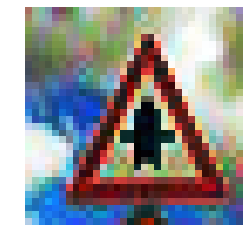

Top 5 Predictions:
'Right-of-way at the next intersection' with probability: 0.0608
'Speed limit (20km/h)' with probability: 0.0224
'Speed limit (30km/h)' with probability: 0.0224
'Speed limit (50km/h)' with probability: 0.0224
'Speed limit (60km/h)' with probability: 0.0224


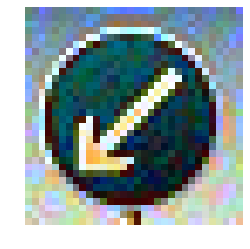

Top 5 Predictions:
'Keep left' with probability: 0.0608
'Speed limit (20km/h)' with probability: 0.0224
'Speed limit (30km/h)' with probability: 0.0224
'Speed limit (50km/h)' with probability: 0.0224
'Speed limit (60km/h)' with probability: 0.0224


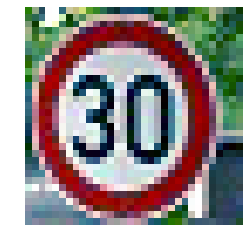

Top 5 Predictions:
'Speed limit (30km/h)' with probability: 0.0607
'Priority road' with probability: 0.0239
'Speed limit (50km/h)' with probability: 0.0225
'Turn left ahead' with probability: 0.0223
'Yield' with probability: 0.0223


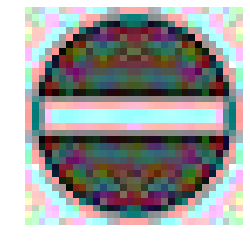

Top 5 Predictions:
'No entry' with probability: 0.0608
'Bumpy road' with probability: 0.0224
'Speed limit (20km/h)' with probability: 0.0224
'Traffic signals' with probability: 0.0224
'End of all speed and passing limits' with probability: 0.0224


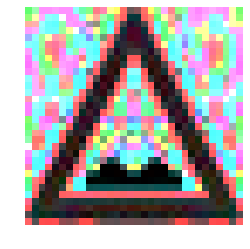

Top 5 Predictions:
'Bumpy road' with probability: 0.0608
'Traffic signals' with probability: 0.0224
'Bicycles crossing' with probability: 0.0224
'General caution' with probability: 0.0224
'Children crossing' with probability: 0.0224


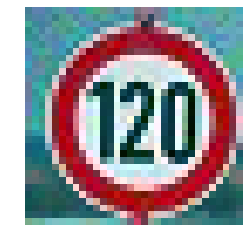

Top 5 Predictions:
'Speed limit (120km/h)' with probability: 0.0608
'Speed limit (20km/h)' with probability: 0.0224
'Speed limit (30km/h)' with probability: 0.0224
'Speed limit (50km/h)' with probability: 0.0224
'Speed limit (60km/h)' with probability: 0.0224


In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.



    
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
from sklearn.preprocessing import normalize

correct_prediction = tf.equal(predictions, y_images)
print("The model is {:.2f}% accurate.".format(accuracy*100))

with tf.Session() as sess:
    saver.restore(sess, './model_best_test')

    for idx, result_logit in enumerate(result_logits):
        plt.imshow(X_images[idx])
        plt.axis('off')
        plt.show()
        result_logit = normalize(result_logit.reshape(1, -1), norm='max', axis=1)[0]

        k = 5
        print("Top {} Predictions:".format(k))
        top_k_predictions = tf.nn.top_k(tf.nn.softmax(result_logit), k)

        top_k_predictions_indices = top_k_predictions[1].eval()
        top_k_predictions_probs = top_k_predictions[0].eval()

        for prediction_index, prediction_prob in zip(top_k_predictions_indices, top_k_predictions_probs):
            prediction_name = sign_names[prediction_index]
            print("'{}' with probability: {:.3}".format(prediction_name, prediction_prob))

    
    
    
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={features : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))

    for featuremap in range(featuremaps):

        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.axis("off")

        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [30]:
import math

def getActivations(layer,stimuli):
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, './model_best_test')
        units = sess.run(layer,feed_dict={features:stimuli,keep_prob:1.0})
        plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,40))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.axis('off')

        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
    plt.show()  


Features
INFO:tensorflow:Restoring parameters from ./model_best_test


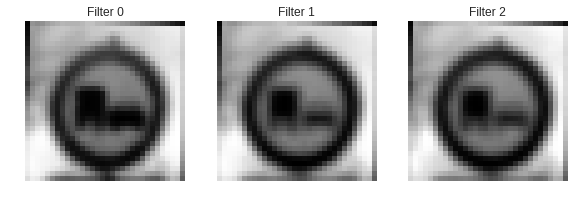

layer_conv1
INFO:tensorflow:Restoring parameters from ./model_best_test


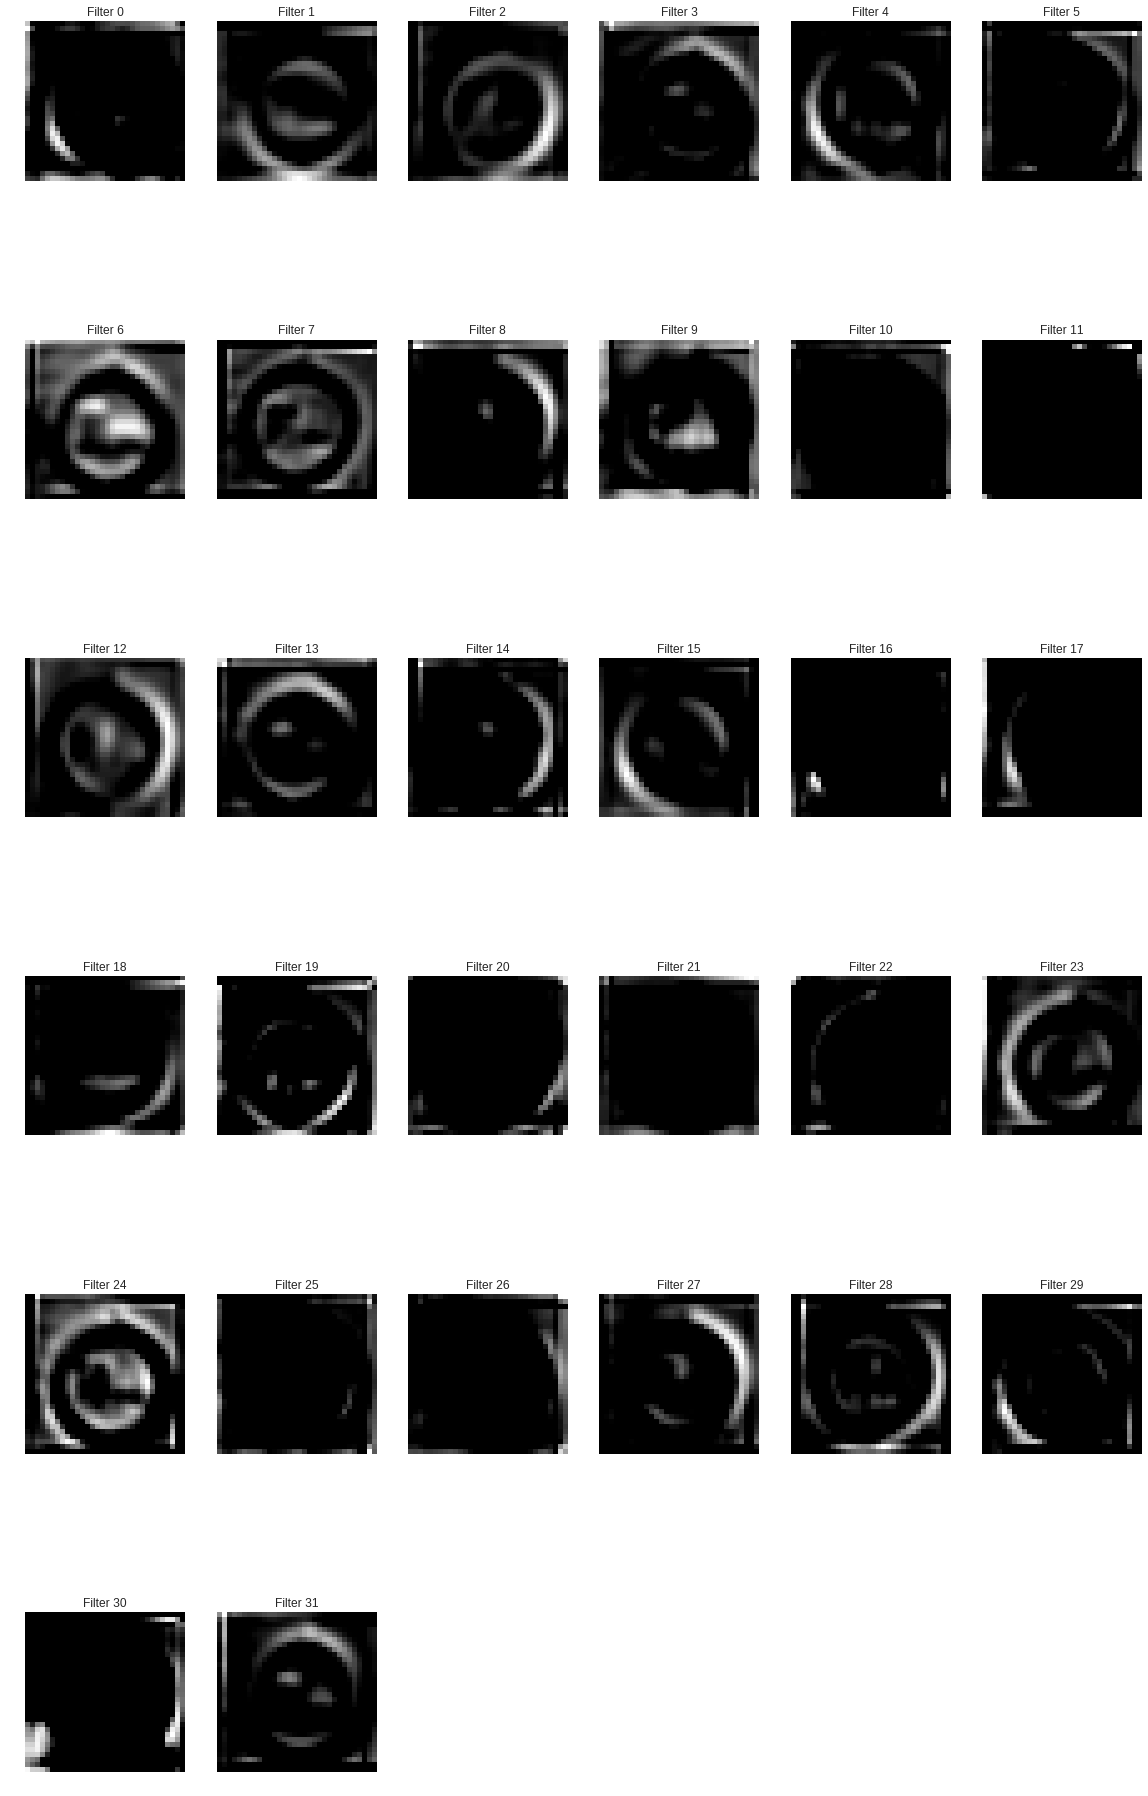

layer_conv2
INFO:tensorflow:Restoring parameters from ./model_best_test


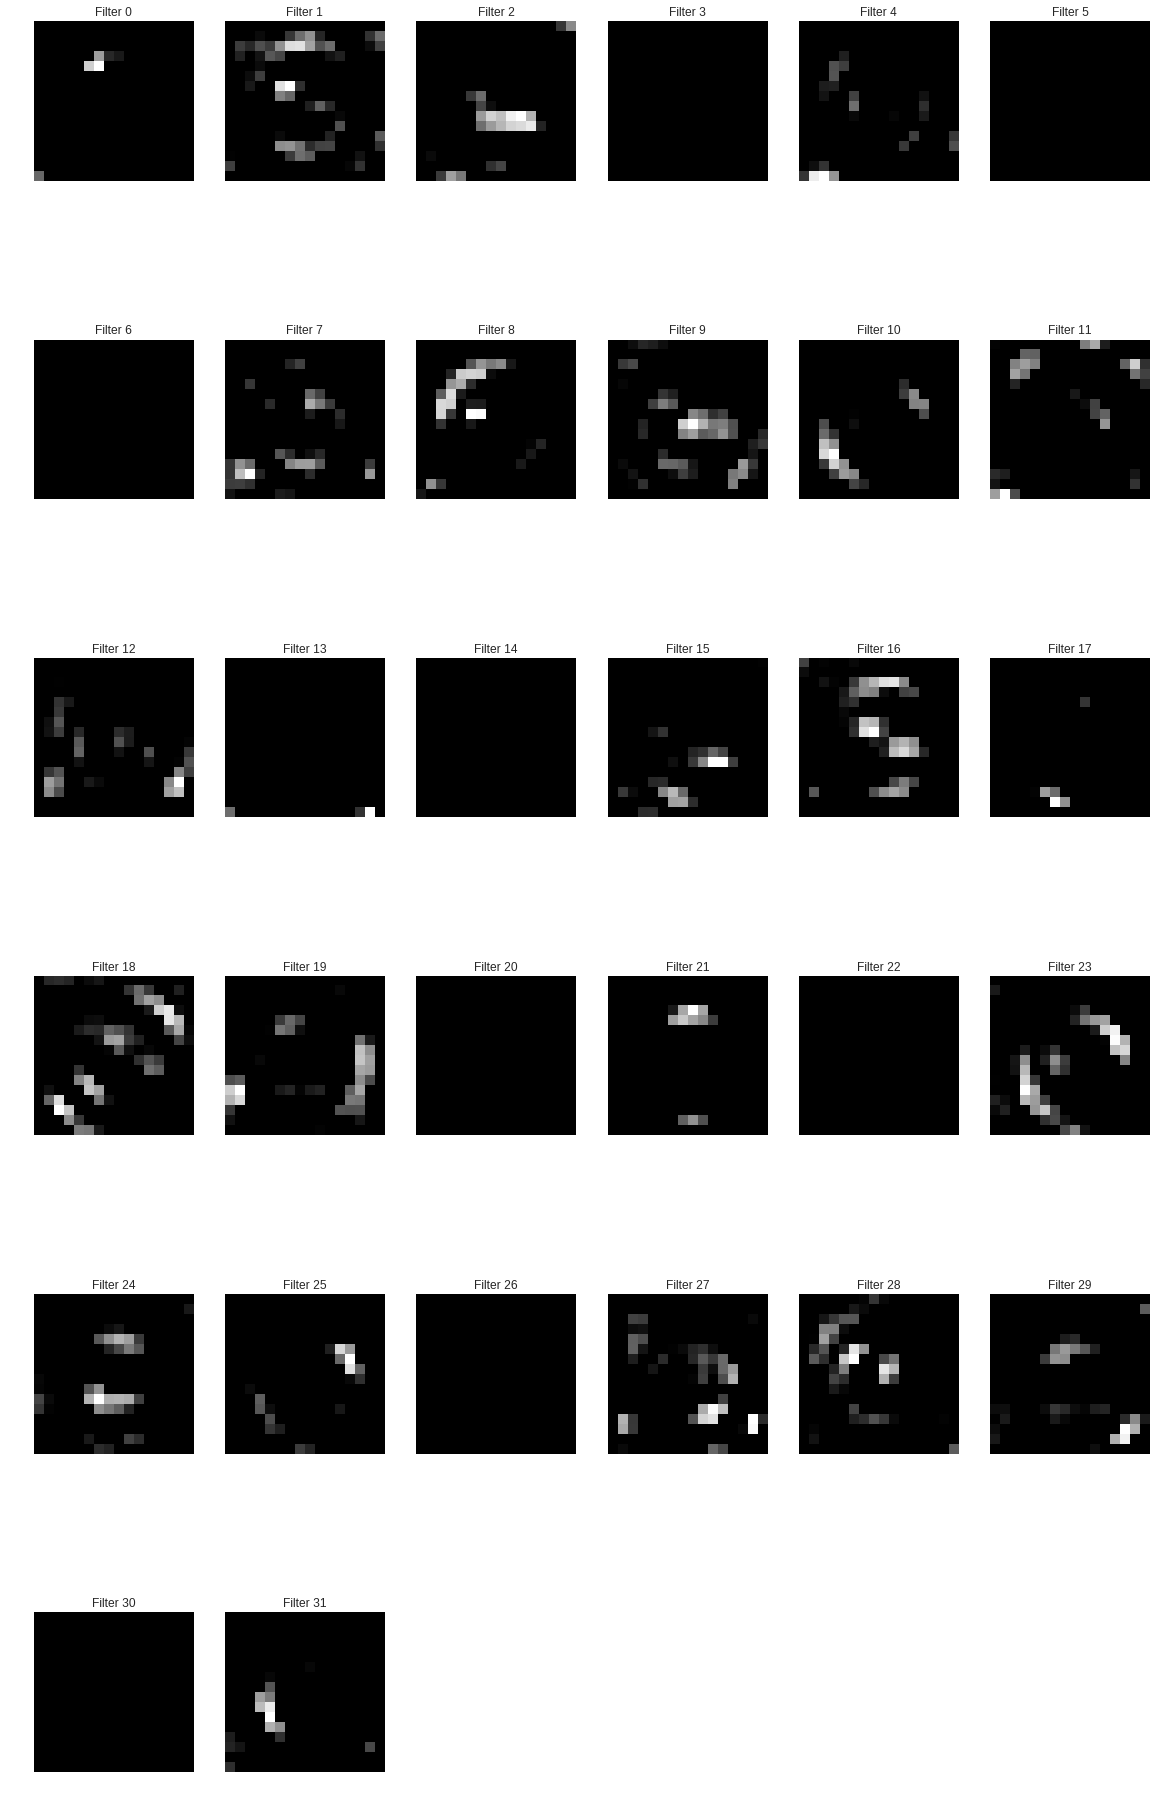

layer_conv3
INFO:tensorflow:Restoring parameters from ./model_best_test


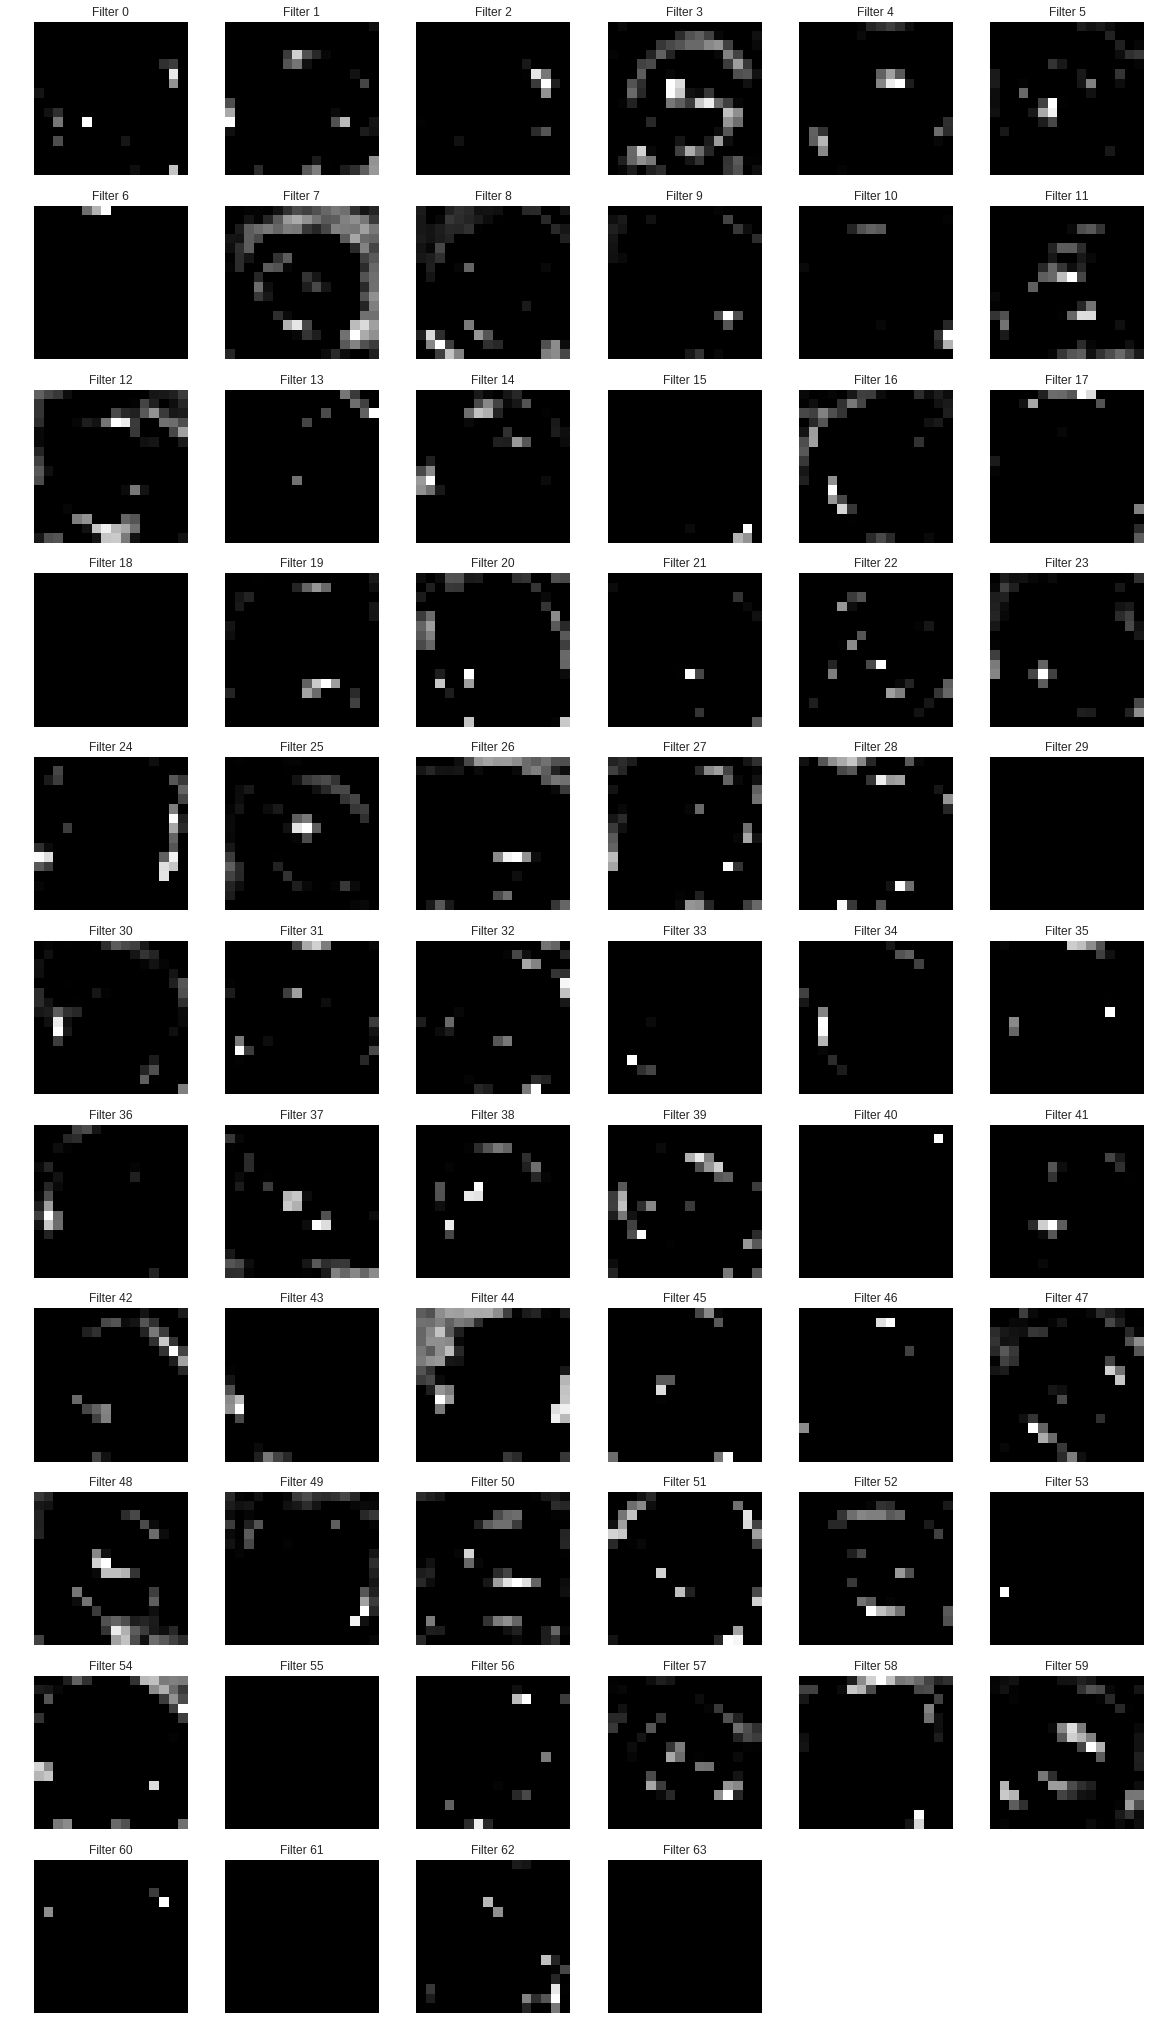

layer_conv4
INFO:tensorflow:Restoring parameters from ./model_best_test


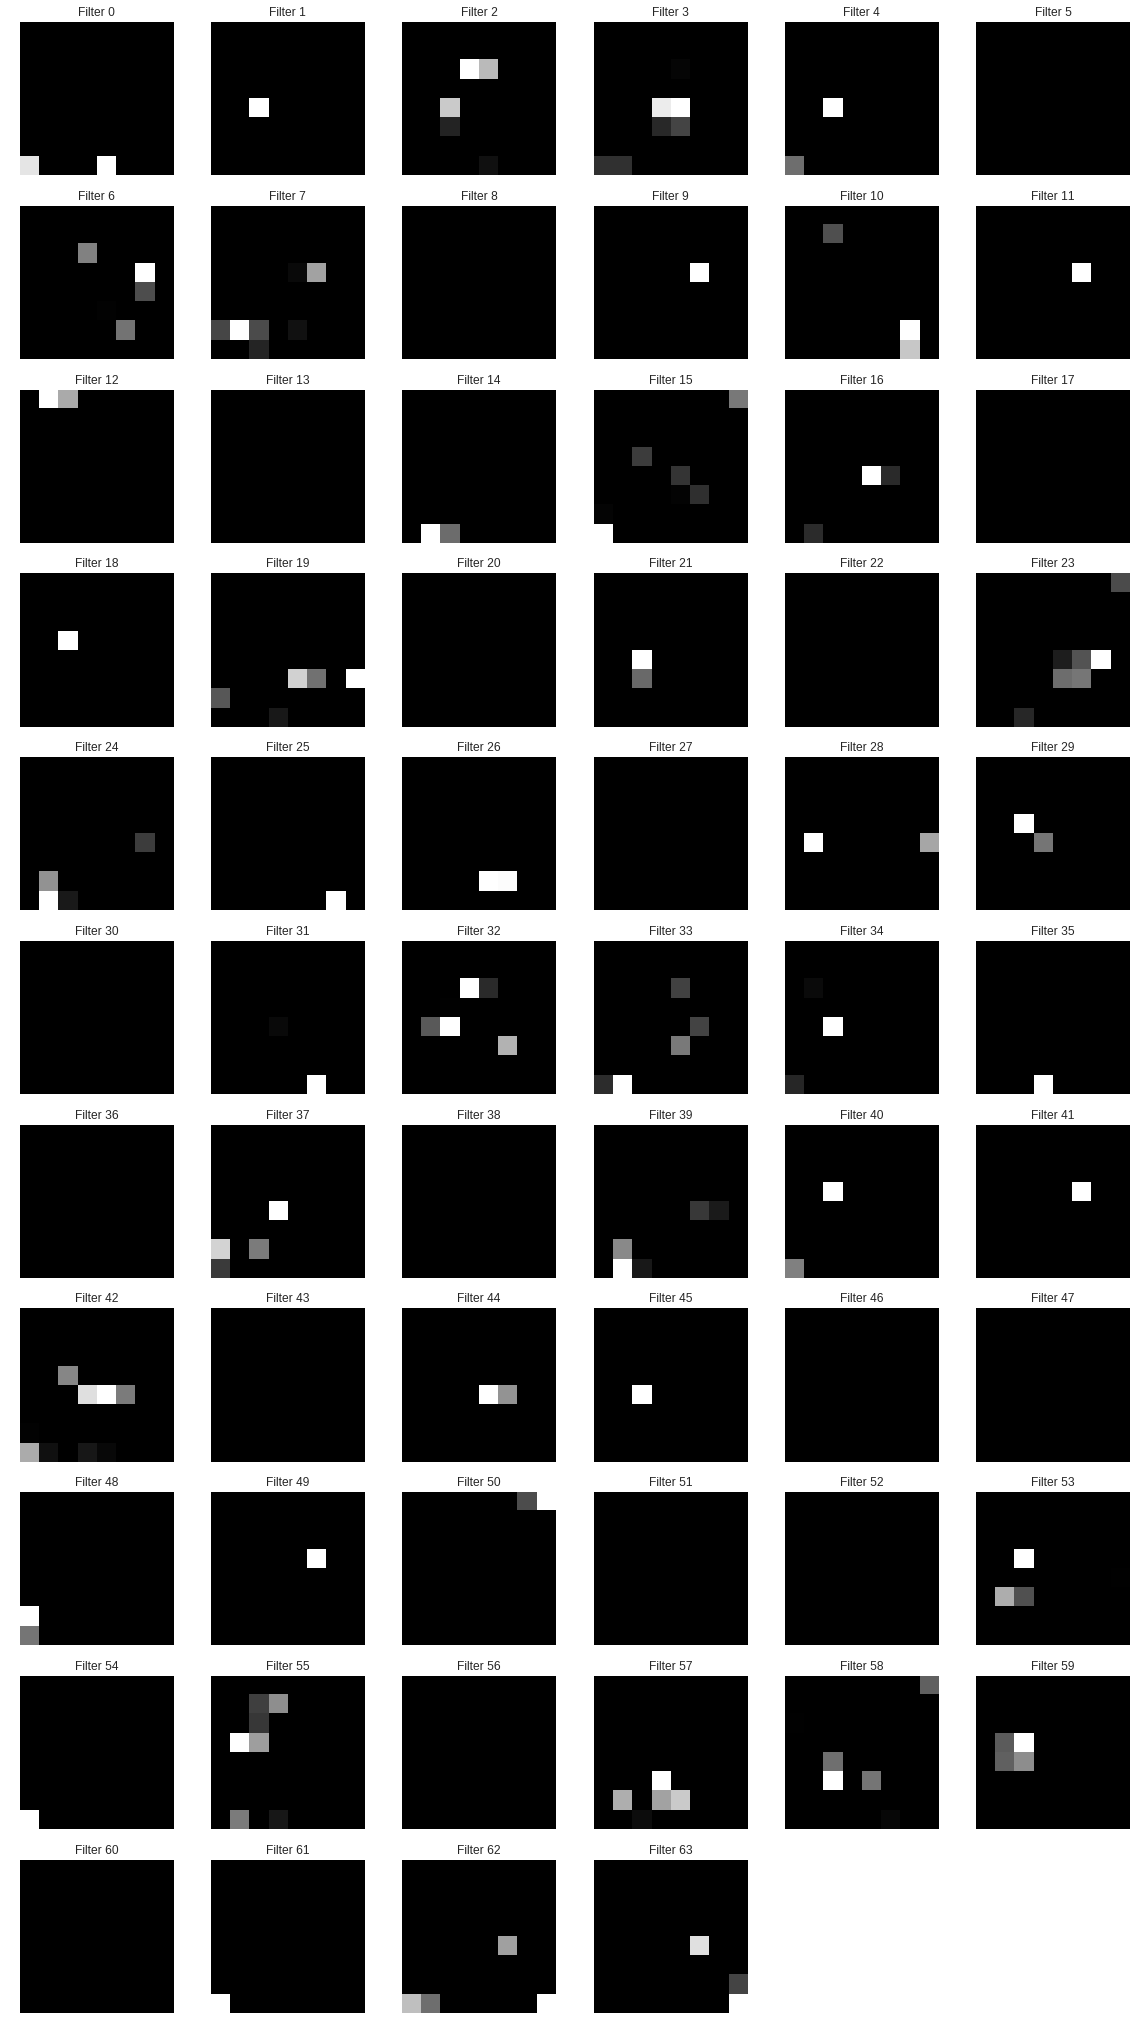

layer_conv5
INFO:tensorflow:Restoring parameters from ./model_best_test


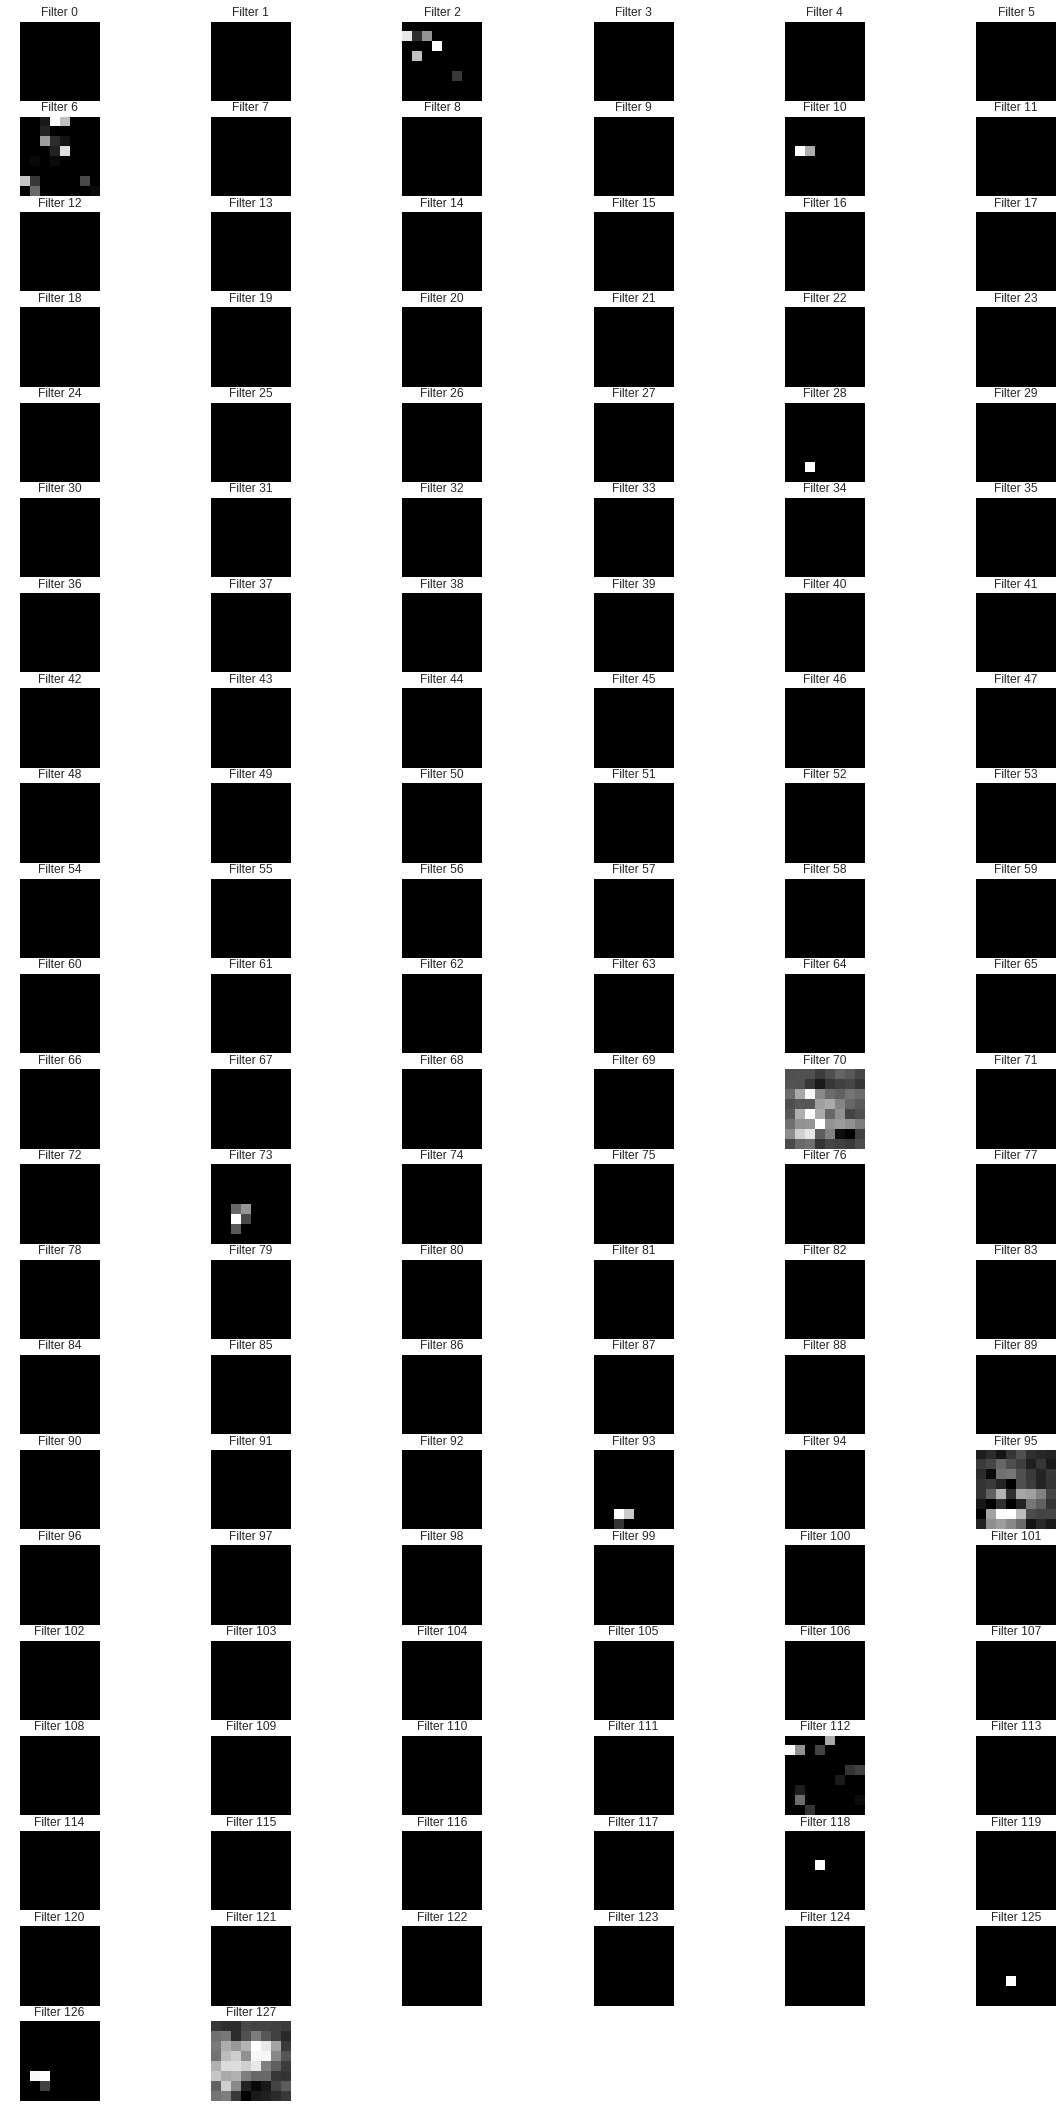

layer_conv6
INFO:tensorflow:Restoring parameters from ./model_best_test


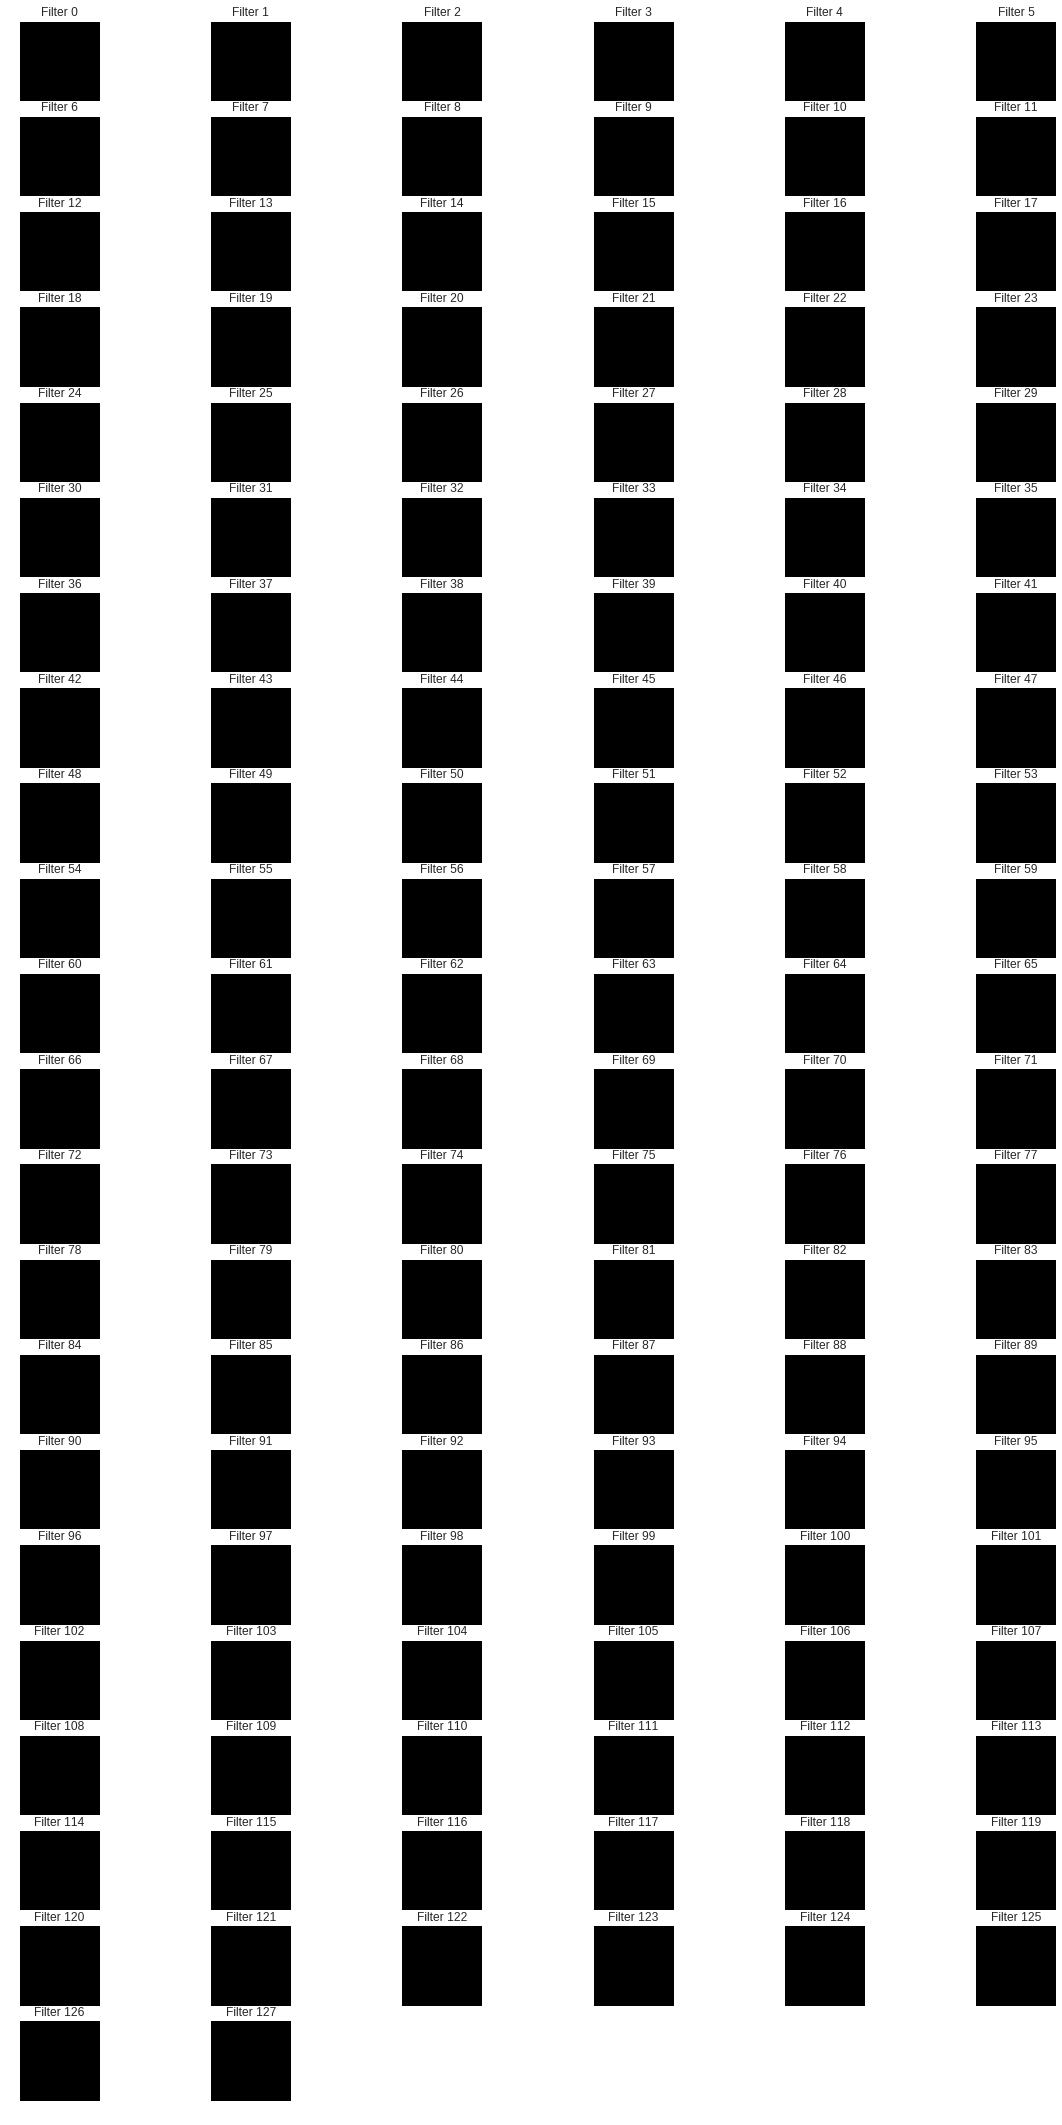

In [31]:
print("Features")
getActivations(features,X_PT_train_1[1:2])
print("layer_conv1")
getActivations(layer_conv1,X_PT_train_1[1:2])
print("layer_conv2")
getActivations(layer_conv2,X_PT_train_1[1:2])
print("layer_conv3")
getActivations(layer_conv3,X_PT_train_1[1:2])
print("layer_conv4")
getActivations(layer_conv4,X_PT_train_1[1:2])
print("layer_conv5")
getActivations(layer_conv5,X_PT_train_1[1:2])
print("layer_conv6")
getActivations(layer_conv6,X_PT_train_1[1:2])


In [32]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:1200px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))    

    
    
with tf.Session() as sess:
    # Convolution (layer 1 after 'tf.nn.conv2d' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    show_graph(tf.get_default_graph().as_graph_def())


INFO:tensorflow:Restoring parameters from ./model_best_test


In [33]:
# Show All Tensor Names in Graph
print("Tensor Names in Graph")
print("========================")
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for op in tf.get_default_graph().get_operations():
        print(str(op.name))

Tensor Names in Graph
INFO:tensorflow:Restoring parameters from ./model_best_test
features
input/tag
input
y_true
ArgMax/dimension
ArgMax
dropout/Placeholder
dropout/dropout_keep_probability/tags
dropout/dropout_keep_probability
features_1/weights/truncated_normal/shape
features_1/weights/truncated_normal/mean
features_1/weights/truncated_normal/stddev
features_1/weights/truncated_normal/TruncatedNormal
features_1/weights/truncated_normal/mul
features_1/weights/truncated_normal
features_1/weights/Weights
features_1/weights/Weights/Assign
features_1/weights/Weights/read
features_1/biases/Const
features_1/biases/Bias
features_1/biases/Bias/Assign
features_1/biases/Bias/read
features_1/conv2d/features
features_1/conv2d/add
features_1/relu/Relu
layer_conv1/weights/truncated_normal/shape
layer_conv1/weights/truncated_normal/mean
layer_conv1/weights/truncated_normal/stddev
layer_conv1/weights/truncated_normal/TruncatedNormal
layer_conv1/weights/truncated_normal/mul
layer_conv1/weights/trunca

save_6/RestoreV2_30/shape_and_slices
save_6/RestoreV2_30
save_6/Assign_30
save_6/RestoreV2_31/tensor_names
save_6/RestoreV2_31/shape_and_slices
save_6/RestoreV2_31
save_6/Assign_31
save_6/RestoreV2_32/tensor_names
save_6/RestoreV2_32/shape_and_slices
save_6/RestoreV2_32
save_6/Assign_32
save_6/RestoreV2_33/tensor_names
save_6/RestoreV2_33/shape_and_slices
save_6/RestoreV2_33
save_6/Assign_33
save_6/RestoreV2_34/tensor_names
save_6/RestoreV2_34/shape_and_slices
save_6/RestoreV2_34
save_6/Assign_34
save_6/RestoreV2_35/tensor_names
save_6/RestoreV2_35/shape_and_slices
save_6/RestoreV2_35
save_6/Assign_35
save_6/RestoreV2_36/tensor_names
save_6/RestoreV2_36/shape_and_slices
save_6/RestoreV2_36
save_6/Assign_36
save_6/RestoreV2_37/tensor_names
save_6/RestoreV2_37/shape_and_slices
save_6/RestoreV2_37
save_6/Assign_37
save_6/RestoreV2_38/tensor_names
save_6/RestoreV2_38/shape_and_slices
save_6/RestoreV2_38
save_6/Assign_38
save_6/RestoreV2_39/tensor_names
save_6/RestoreV2_39/shape_and_slices


save_17/RestoreV2_62
save_17/Assign_62
save_17/RestoreV2_63/tensor_names
save_17/RestoreV2_63/shape_and_slices
save_17/RestoreV2_63
save_17/Assign_63
save_17/RestoreV2_64/tensor_names
save_17/RestoreV2_64/shape_and_slices
save_17/RestoreV2_64
save_17/Assign_64
save_17/RestoreV2_65/tensor_names
save_17/RestoreV2_65/shape_and_slices
save_17/RestoreV2_65
save_17/Assign_65
save_17/RestoreV2_66/tensor_names
save_17/RestoreV2_66/shape_and_slices
save_17/RestoreV2_66
save_17/Assign_66
save_17/RestoreV2_67/tensor_names
save_17/RestoreV2_67/shape_and_slices
save_17/RestoreV2_67
save_17/Assign_67
save_17/RestoreV2_68/tensor_names
save_17/RestoreV2_68/shape_and_slices
save_17/RestoreV2_68
save_17/Assign_68
save_17/RestoreV2_69/tensor_names
save_17/RestoreV2_69/shape_and_slices
save_17/RestoreV2_69
save_17/Assign_69
save_17/RestoreV2_70/tensor_names
save_17/RestoreV2_70/shape_and_slices
save_17/RestoreV2_70
save_17/Assign_70
save_17/RestoreV2_71/tensor_names
save_17/RestoreV2_71/shape_and_slices
s

save_29/RestoreV2_42
save_29/Assign_42
save_29/RestoreV2_43/tensor_names
save_29/RestoreV2_43/shape_and_slices
save_29/RestoreV2_43
save_29/Assign_43
save_29/RestoreV2_44/tensor_names
save_29/RestoreV2_44/shape_and_slices
save_29/RestoreV2_44
save_29/Assign_44
save_29/RestoreV2_45/tensor_names
save_29/RestoreV2_45/shape_and_slices
save_29/RestoreV2_45
save_29/Assign_45
save_29/RestoreV2_46/tensor_names
save_29/RestoreV2_46/shape_and_slices
save_29/RestoreV2_46
save_29/Assign_46
save_29/RestoreV2_47/tensor_names
save_29/RestoreV2_47/shape_and_slices
save_29/RestoreV2_47
save_29/Assign_47
save_29/RestoreV2_48/tensor_names
save_29/RestoreV2_48/shape_and_slices
save_29/RestoreV2_48
save_29/Assign_48
save_29/RestoreV2_49/tensor_names
save_29/RestoreV2_49/shape_and_slices
save_29/RestoreV2_49
save_29/Assign_49
save_29/RestoreV2_50/tensor_names
save_29/RestoreV2_50/shape_and_slices
save_29/RestoreV2_50
save_29/Assign_50
save_29/RestoreV2_51/tensor_names
save_29/RestoreV2_51/shape_and_slices
s

INFO:tensorflow:Restoring parameters from ./model_best_test


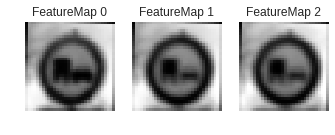

In [34]:

with tf.Session() as sess:
    # Convolution (layer 1 after 'tf.nn.conv2d' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1 = sess.graph.get_tensor_by_name('features:0')
    outputFeatureMap( X_PT_train_1[1:2], conv1)
    plt.savefig('examples/featuremap.png')


INFO:tensorflow:Restoring parameters from ./model_best_test


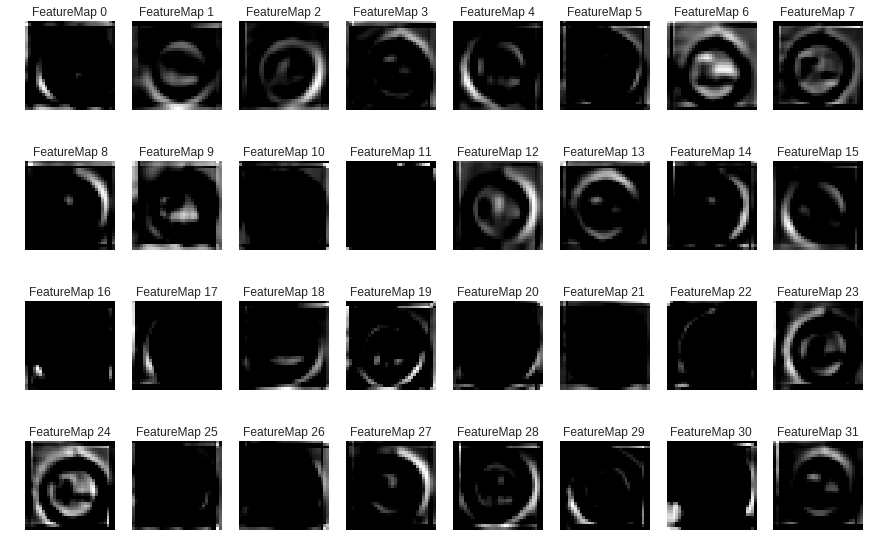

In [35]:
with tf.Session() as sess:
    # ReLU-activation (layer 1 after 'tf.nn.relu' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv1_relu = sess.graph.get_tensor_by_name('layer_conv1/conv2d/layer_conv1:0')
    outputFeatureMap( X_PT_train_1[1:2], layer_conv1)
    plt.savefig('examples/conv1.png')

INFO:tensorflow:Restoring parameters from ./model_best_test


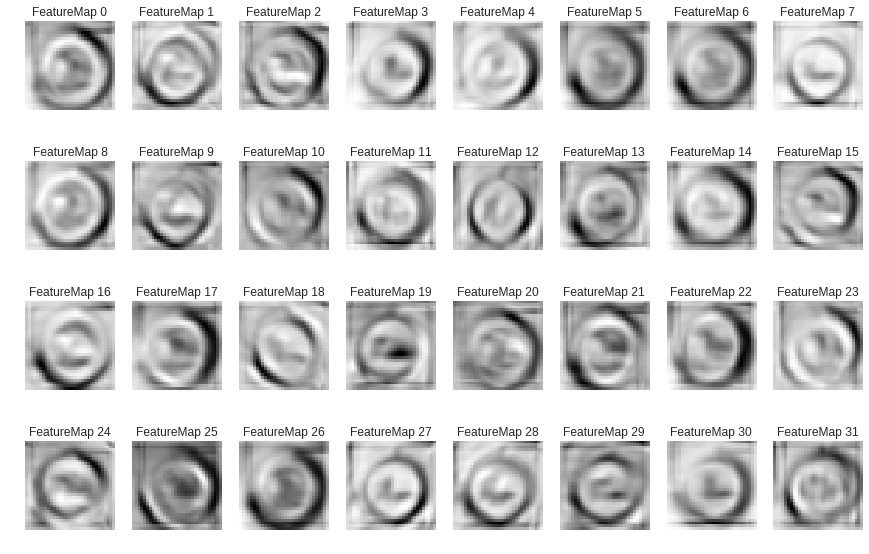

In [36]:

with tf.Session() as sess:
    # Max-pooling (layer 1 after 'tf.nn.max_pool' operation)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    conv2_pool = sess.graph.get_tensor_by_name('layer_conv2/conv2d/layer_conv2:0')
    outputFeatureMap(X_PT_train_1[1:2], conv2_pool)
    plt.savefig('examples/conv2.png')